<h1><font color="#113D68" size=5>TINTOlib: Converting Tidy Data into Image for Classification with 2-Dimensional Convolutional Neural Networks</font></h1>

<br><br>
<div style="text-align: right">
<font color="#113D68" size=3>Borja Reinoso Hidalgo</font><br>
<font color="#113D68" size=3>Manuel Castillo-Cara</font><br>
<font color="#113D68" size=3>Raúl García-Castro</font><br>

</div>

---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Index</font></h2>

* [0. Context](#section0)
* [1. Description](#section1)
    * [1.1. Main Features](#section12)
* [2. Libraries](#section2)
* [3. Data processing](#section3)
    * [3.1. Create images](#section31)
    * [3.2. Read Images](#section32)
* [4. Pre-modelling phase](#section4)
    * [4.1. Data curation](#section41)
    * [4.2. Resize Images](#section42)
    * [4.3. Iterators](#section43)
* [5. Modelling hybrid network](#section5)
    * [5.1. Hybrid network](#section51)
    * [5.2. Compile and fit](#section52)
* [6. Results](#section6)

---
<a id="section0"></a>
# <font color="#004D7F" size=6> 0. Context</font>

This is a tutorial on how to read the images created by TINTO and pass them to a very simple pretrained Convolutional Neural Network (CNN). The images must already be created by the TINTO software. See the documentation in GITHUB for how to create the images from tabular data.

Remember that when using CNN you can set the training to be done with GPUs to improve performance.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
You can see all information about TINTOlib in [GitHub](https://github.com/oeg-upm/TINTOlib)

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section1"></a>
# <font color="#004D7F" size=6> 1. Description</font>

The growing interest in the use of algorithms-based machine learning for predictive tasks has generated a large and diverse development of algorithms. However, it is widely known that not all of these algorithms are adapted to efficient solutions in certain tidy data format datasets. For this reason, novel techniques are currently being developed to convert tidy data into images with the aim of using Convolutional Neural Networks (CNNs). TINTOlib offers the opportunity to convert tidy data into images through several techniques: TINTO, IGTD, REFINED, SuperTML, BarGraph, DistanceMatrix and Combination.

---
<a id="section11"></a>
# <font color="#004D7F" size=5> 1.1. Main Features</font>

- Supports all CSV data in **[Tidy Data](https://www.jstatsoft.org/article/view/v059i10)** format.
- For now, the algorithm converts tabular data for binary and multi-class classification problems into machine learning.
- Input data formats:
    - **Tabular files**: The input data could be in **[CSV](https://en.wikipedia.org/wiki/Comma-separated_values)**, taking into account the **[Tidy Data](https://www.jstatsoft.org/article/view/v059i10)** format.
    - **Dataframe***: The input data could be in **[Pandas Dataframe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)**, taking into account the **[Tidy Data](https://www.jstatsoft.org/article/view/v059i10)** format.
    - **Tidy Data**: The **target** (variable to be predicted) should be set as the last column of the dataset. Therefore, the first columns will be the features.
    - All data must be in numerical form. TINTOlib does not accept data in string or any other non-numeric format.
- Runs on **Linux**, **Windows** and **macOS** systems.
- Compatible with **[Python](https://www.python.org/)** 3.7 or higher.

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section2"></a>
# <font color="#004D7F" size=6> 2. Libraries</font>

The first thing we need to do is to declare the libraries

In [1]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
#import cv2
import gc
import matplotlib.pyplot as plt
#import openslide
#from openslide.deepzoom import DeepZoomGenerator
import tifffile as tifi
import sklearn
import tensorflow as tf

from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import vgg16, vgg19, resnet50, mobilenet, inception_resnet_v2, densenet, inception_v3, xception, nasnet, ResNet152V2
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, InputLayer, LayerNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, Adamax

from imblearn.over_sampling import RandomOverSampler
#Models of TINTOlib
from TINTOlib.tinto import TINTO
from TINTOlib.supertml import SuperTML
from TINTOlib.igtd import IGTD
from TINTOlib.refined import REFINED
from TINTOlib.barGraph import BarGraph
from TINTOlib.distanceMatrix import DistanceMatrix
from TINTOlib.combination import Combination

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section3"></a>
# <font color="#004D7F" size=6> 3. Data processing</font>

The first thing to do is to read all the images created by TINTO. TINTO creates a folder which contains subfolders corresponding to each target that has the problem. Each image corresponds to a sample of the original dataset.

<a id="section31"></a>
# <font color="#004D7F" size=5> 3.1. Create images with TINTOlib</font>

In [ ]:
#Select the model and the parameters
problem_type = "supervised"
image_model = REFINED(problem= problem_type,hcIterations=5)
#image_model = TINTO(problem= problem_type,blur=True)

#Define the dataset path and the folder where the images will be saved
dataset_path = "cancer.csv"
images_folder = "classificationtintolib"



In [ ]:
#Read CSV
df=pd.read_csv(dataset_path)
df = df.drop('id', axis=1)

diagnosis_col = df['diagnosis']
df = df.drop('diagnosis', axis=1)
df['diagnosis'] = diagnosis_col

In [ ]:
#Generate the images
image_model.generateImages(df, images_folder)
img_paths = os.path.join(images_folder,problem_type+".csv")

print(img_paths)

<a id="section32"></a>
# <font color="#004D7F" size=5> 3.2. Read images</font>

Read the images path csv

In [ ]:
df = pd.read_csv(img_paths)
df["class"] = df["class"].astype(str)
df["images"]= images_folder + "/" + df["images"]

print(df["images"][0])
print(df["class"].value_counts())

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section4"></a>
# <font color="#004D7F" size=6> 4. Pre-modelling phase</font>

<a id="section41"></a>
# <font color="#004D7F" size=5> 4.1. Data curation</font>

Split in train/test/validation

In [4]:
df_x = df.drop('class', axis = 1)
df_y = df['class']

X_train, X_val, y_train, y_val = train_test_split(df_x, df_y, test_size = 0.40, random_state=42,stratify=df_y)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.50, random_state=42,stratify=y_val)


In [5]:
df_train = pd.concat([X_train, y_train], axis = 1)
df_test = pd.concat([X_test, y_test], axis = 1)
df_val = pd.concat([X_val, y_val], axis = 1)

In [6]:
print(df_train['class'].value_counts())
print(' ')
print(' ')
print(df_test['class'].value_counts())
print(' ')
print(' ')
print(df_val['class'].value_counts())

5.0    408
6.0    383
7.0    119
Name: class, dtype: int64
 
 
5.0    137
6.0    127
7.0     40
Name: class, dtype: int64
 
 
5.0    136
6.0    128
7.0     40
Name: class, dtype: int64


<a id="section42"></a>
# <font color="#004D7F" size=5> 4.2. Resize images</font>

In our case, as we are going to train with a pre-trained network, we must resize it to the dimensions established by the network. Therefore, if you make a customised CNN, this cell is optional. 

In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)
teste_datagen = ImageDataGenerator(rescale = 1./255)

In [8]:
print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(910, 2)
(304, 2)
(304, 2)


<a id="section43"></a>
# <font color="#004D7F" size=5> 4.3. Iterators</font>

Create iterators for train/test/validation

In [ ]:
pixels = 20

In [9]:
train_iter = train_datagen.flow_from_dataframe(
    df_train, 
    target_size = (pixels, pixels),
    x_col = 'images',
    y_col = 'class',
    class_mode = 'categorical',
    color_mode='grayscale',
    batch_size = 8,
    shuffle = True
)

Found 910 validated image filenames belonging to 3 classes.


In [10]:
valid_iter = train_datagen.flow_from_dataframe(
    df_val, 
    target_size = (pixels, pixels),
    x_col = 'images',
    y_col = 'class',
    class_mode = 'categorical',
    color_mode='grayscale',
    batch_size = 8,
    shuffle = False
)

Found 304 validated image filenames belonging to 3 classes.


In [11]:
test_iter = train_datagen.flow_from_dataframe(
    df_test, 
    target_size = (pixels, pixels),
    x_col = 'images',
    y_col = 'class',
    class_mode = 'categorical',
    color_mode='grayscale',
    batch_size = 8,
    shuffle = False
)

Found 304 validated image filenames belonging to 3 classes.


In [12]:
print(train_iter.image_shape)
print(valid_iter.image_shape)
print(test_iter.image_shape)

(20, 20, 1)
(20, 20, 1)
(20, 20, 1)


---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section5"></a>
# <font color="#004D7F" size=6> 5. Modelling with CNN</font>

Now we can start the CNN training. Before that we prepare the algorithm for reading data.

<a id="section51"></a>
# <font color="#004D7F" size=5> 5.1. CNN</font>

In [13]:
dropout = 0.5
epochs = 200
n_class = df['class'].value_counts().count()

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, AveragePooling2D
from keras.layers import  BatchNormalization, Activation, Input, Concatenate
from keras.utils import plot_model




In [15]:
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, AveragePooling2D
from keras.layers import  BatchNormalization, Activation, Input, Concatenate
from keras.utils import plot_model

def cnn_branch(filters,kernel, input_shape):
    cnn_model = Sequential()
    cnn_model.add(input_shape)

    for layer in filters:
        cnn_model.add(Conv2D(layer, (kernel, kernel), padding="same"))
        cnn_model.add(Activation("relu"))
        cnn_model.add(BatchNormalization())
        cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
        
    return cnn_model


In [16]:
from tensorflow.keras.layers import Input, Activation,MaxPooling2D, concatenate
#Input

input_shape = Input(shape=(pixels, pixels, 1))
filters_cnn = [16,32,64,128] 
tower_1 = cnn_branch(filters_cnn,3,input_shape)
  
#Flatten
merged = Flatten()(tower_1.output)
        
#Dense layers

out = Dense(128,activation='relu')(merged)
out = BatchNormalization()(out)
out = Dropout(dropout)(out)
out = Dense(64,activation='relu')(out)
out = BatchNormalization()(out)
out = Dropout(dropout)(out)
out = Dense(32,activation='relu')(out)
out = BatchNormalization()(out)
out = Dropout(dropout)(out)     
#Capa final de clasificación
out = Dense(n_class, activation='softmax')(out)
        
  
model = Model(input_shape, out)

In [17]:
METRICS = [
      tf.keras.metrics.TruePositives(name = 'tp'),
      tf.keras.metrics.FalsePositives(name = 'fp'),
      tf.keras.metrics.TrueNegatives(name = 'tn'),
      tf.keras.metrics.FalseNegatives(name = 'fn'), 
      tf.keras.metrics.BinaryAccuracy(name ='accuracy'),
      tf.keras.metrics.Precision(name = 'precision'),
      tf.keras.metrics.Recall(name = 'recall'),
      tf.keras.metrics.AUC(name = 'auc'),
]

<a id="section52"></a>
# <font color="#004D7F" size=5> 5.2. Compile and fit</font>

In [18]:
model.compile(
                #optimizer = sgd,
                #optimizer = opt,
                optimizer = 'adam',
                #optimizer = 'Adadelta',
                #optimizer = 'Adamax',
                
                metrics = METRICS,
                #metrics = ['accuracy'],
                #metrics = ['mse'],
                
                #loss = 'binary_crossentropy'
                loss = 'categorical_crossentropy'
                #loss = 'mean_absolute_error'
                #loss = 'mse'
                #loss = 'mean_squared_logarithmic_error'
                )

In [ ]:
modelfitprogress = model.fit(
                              train_iter,
                              validation_data = valid_iter,
                              epochs = epochs,
                              steps_per_epoch = df_train.shape[0]//train_iter.batch_size,
                              validation_steps = df_val.shape[0]//valid_iter.batch_size
                              )

<a id="section6"></a>
# <font color="#004D7F" size=6> 6. Results</font>

Finally, we can evaluate our CNN with the images created by TINTO in any of the ways represented below.

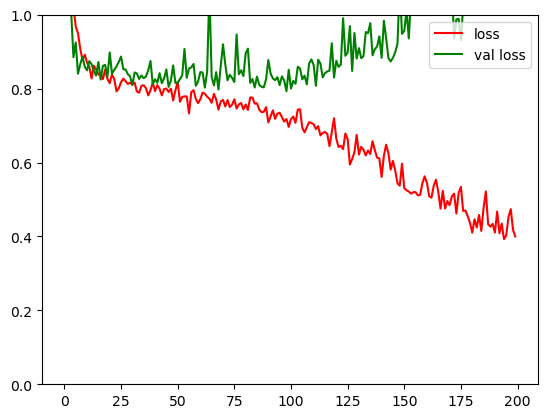

In [20]:
plt.plot(modelfitprogress.history['loss'], color = 'red', label = 'loss')
plt.plot(modelfitprogress.history['val_loss'], color = 'green', label = 'val loss')
plt.legend(loc = 'upper right')
plt.ylim(0,1)
plt.show()

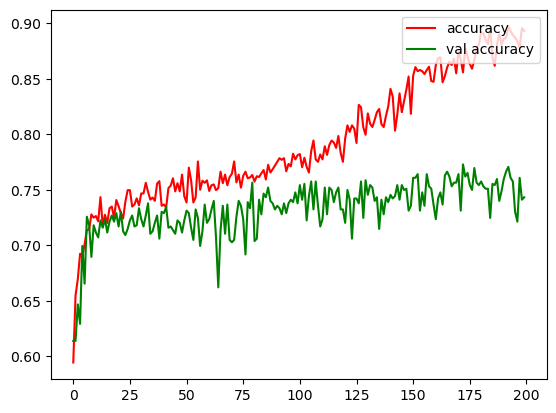

In [21]:
plt.plot(modelfitprogress.history['accuracy'], color = 'red', label = 'accuracy')
plt.plot(modelfitprogress.history['val_accuracy'], color = 'green', label = 'val accuracy')
plt.legend(loc = 'upper right')

plt.show()

In [22]:
score = model.evaluate(valid_iter, steps = df_val.shape[0]//valid_iter.batch_size)
print("Loss in validation: {} \nAccuracy in validation: {}".format(score[0], score[5]))

38/38 [==============================] - 1s 13ms/step - loss: 1.1119 - tp: 183.0000 - fp: 113.0000 - tn: 495.0000 - fn: 121.0000 - accuracy: 0.7434 - precision: 0.6182 - recall: 0.6020 - auc: 0.8002
Loss in validation: 1.1119256019592285 
Accuracy in validation: 0.7434210777282715


In [34]:
score_test = model.evaluate(test_iter, steps = df_test.shape[0]//test_iter.batch_size)
print("Loss in test: {} \nAccuracy in test: {}".format(score_test[0], score_test[5]))

38/38 [==============================] - 1s 13ms/step - loss: 0.8849 - tp: 207.0000 - fp: 88.0000 - tn: 520.0000 - fn: 97.0000 - accuracy: 0.7971 - precision: 0.7017 - recall: 0.6809 - auc: 0.8509
Loss in test: 0.8849334716796875 
Accuracy in test: 0.797149121761322


In [39]:
score_test[6]

0.701694905757904

In [ ]:
#test_images = next(test_iter)[0]
prediction = model.predict(test_iter, steps = np.math.ceil(test_iter.samples/test_iter.batch_size))
#prediction = model.predict(test_images)
print(prediction)

In [27]:
x = pd.DataFrame(predicted_classes, columns = ['class'])
x['class'].value_counts()

0    139
1    126
2     39
Name: class, dtype: int64

In [28]:
true_classes = test_iter.classes
class_labels = list(test_iter.class_indices.keys())  

In [40]:
from sklearn.metrics import roc_auc_score,accuracy_score,precision_score, recall_score

test_accuracy = score_test[5]
test_auc = score_test[8]
test_precision = score_test[6]
test_recall = score_test[7]

print("Test accuracy:",test_accuracy)
print("Test AUC:",test_auc)
print("Test precision:",test_precision)
print("Test recall:",test_recall)

Test accuracy: 0.797149121761322
Test AUC: 0.8509078621864319
Test precision: 0.701694905757904
Test recall: 0.6809210777282715


In [ ]:
train_accuracy = modelfitprogress.history["accuracy"][-1]
train_auc = modelfitprogress.history["auc"][-1]
train_precision = modelfitprogress.history["precision"][-1]
train_recall = modelfitprogress.history["recall"][-1]
train_loss = modelfitprogress.history["loss"][-1]

print("Train accuracy:",train_accuracy)
print("Train AUC:",train_auc)
print("Train precision:",train_precision)
print("Train recall:",train_recall)
print("Train loss:",train_loss)

In [ ]:
validation_accuracy = modelfitprogress.history["val_accuracy"][-1]
validation_auc = modelfitprogress.history["val_auc"][-1]
validation_precision = modelfitprogress.history["val_precision"][-1]
validation_recall = modelfitprogress.history["val_recall"][-1]
validation_loss = modelfitprogress.history["val_loss"][-1]

print("Validation accuracy:",validation_accuracy)
print("Validation AUC:",validation_auc)
print("Validation precision:",validation_precision)
print("Validation recall:",validation_recall)
print("Validation loss:",validation_loss)

<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>